# 4. Fingerprinting
 * Working with (relatively distributed) local spectrogtram maxima
 * Create pairs of features
  * pick "neighboring" points
  * $(f_1, f_2, t_2-t_1), t_1\\ (f_1, f_3, t_3-t_1), t_1\\ \vdots \\ n_{fanout}$
 * Create **database** dictionary
  * $(f_n, f_{n+1}, t_{n+1}-t_n) \to (song\_id, t_{fingerprint})$

### At runtime:
 * Analyze sample
 * Look up fingerprints in database
 * Count the number of same offsets in same song

song | $\Delta$ t | matches
--- | --- | ---
song_1 | 29 | 150
song_2 | 3 | 10
song_2 | 1 | 3

 * Choose the top match

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from fingerprinting import fingerprints

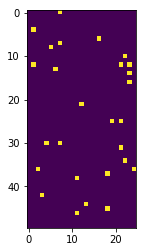

In [6]:
# Dummy peak array
spec = np.random.random((50, 25)) > 0.98


fig, ax = plt.subplots()
ax.imshow(spec)

In [20]:
fff = fingerprints(spec)



In [78]:
from collections import Counter

def search_database(dic, fingerpairs,min_matches = 50):
    
    '''
    INPUTS

        dic:   dictionary with (f_n+1, f_n, f_n+1-t_n): [(song_name, t_n)...]

        fingerpairs:     [(f_n+1, f_n, f_n+1-t_n), t_n] x N
        
        min_matches:     minimum number of matches for the top song to be confirmed as the match

    OUTPUTS
    
        name of the song with the most matches
        OR -1 if no single song fulfills the number of min_match
    '''
    
    cnt = Counter()
    for fpair in fingerpairs:
        if fpair[0] in dic:
            for songname, t in dic[fpair[0]]:
              #  print(fpair[1])
              #  print(obj1)
                #print(obj[1].type)
                offset = fpair[1]-t
                cnt[(songname, offset)]+=1
        else: continue
    song = cnt.most_common(1)
    if cnt.most_common(1)[1] > min_matches:
        return cnt.most_common(1)[0][0][0] 
    else: return -1

In [79]:
#print(fff)

dict = {(4,12,0): [('despacito',1),('crazy',18)], (4,11,0): [('craz',11)],(37,45,0): [('despacito',18)],(10,36,2): [('desp',10)],(16,36,1): [('despa',10)],(12,14,0): [('despac',10)]}
print(search_database(dict,fff))


('despacito', 0)
